In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv("/content/desafio.csv")
df.head()
df.describe()

,Unnamed: 0,x1,x2,x3,y
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,0.176208,-0.135924,-0.059572,0.128614
std,144.481833,2.836360,2.988853,2.989460,1.902132
min,0.000000,-4.944779,-4.950600,-4.953680,-5.519663
25%,124.750000,-2.417834,-2.957984,-2.696848,-0.937088
50%,249.500000,0.343568,-0.112551,0.018557,0.108345
75%,374.250000,2.595988,2.445826,2.567203,1.216986
max,499.000000,4.997177,4.979341,4.911686,7.153553


In [ ]:
X=df[["x1","x2","x3"]]
Y=df["y"]

<Axes: xlabel='x1', ylabel='y'>

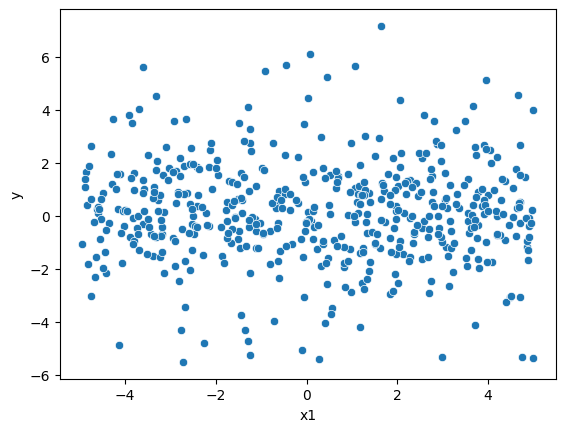

In [ ]:
sns.scatterplot(x=X["x1"],y=Y)
# A variável "crim" pode ter relação com a resposta

<Axes: xlabel='x2', ylabel='y'>

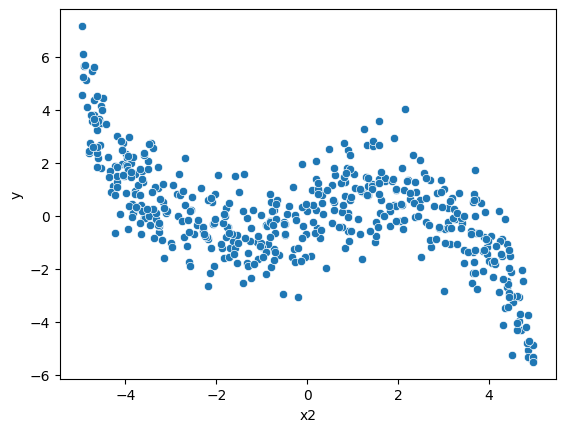

In [ ]:
sns.scatterplot(x=X["x2"],y=Y)

<Axes: xlabel='x3', ylabel='y'>

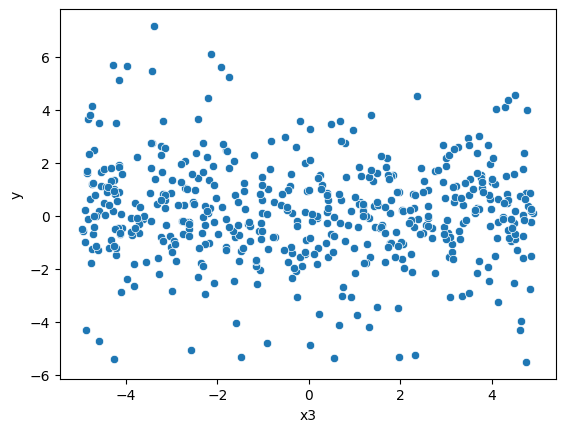

In [ ]:
sns.scatterplot(x=X["x3"],y=Y)

<Axes: xlabel='x1', ylabel='x2'>

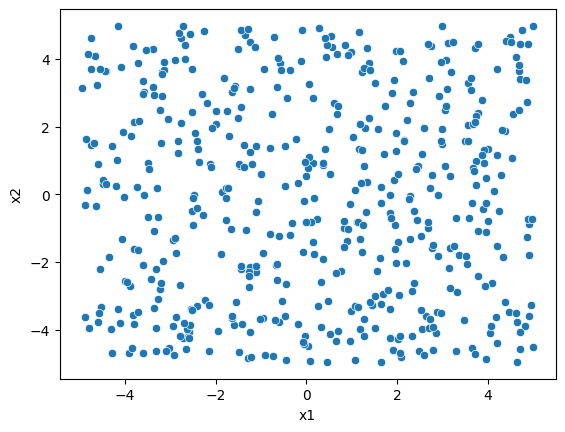

In [ ]:
sns.scatterplot(x=X["x1"],y=X["x2"])

<Axes: xlabel='x1', ylabel='x3'>

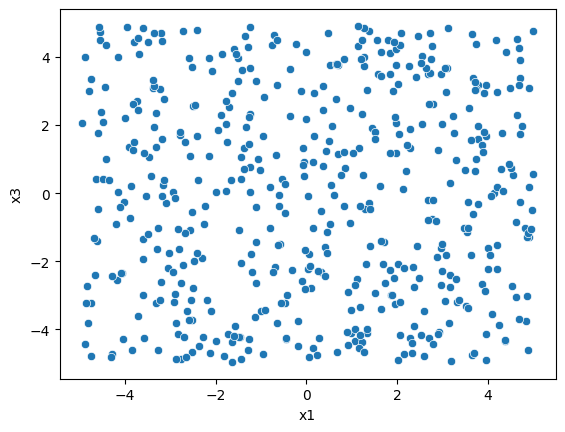

In [ ]:
sns.scatterplot(x=X["x1"],y=X["x3"])

<Axes: xlabel='x2', ylabel='x3'>

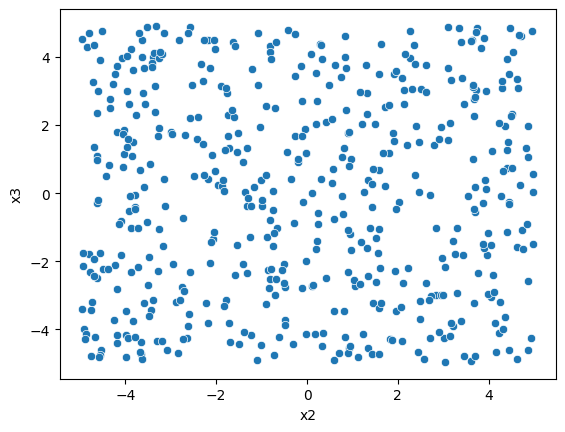

In [ ]:
sns.scatterplot(x=X["x2"],y=X["x3"])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=420)



In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, Y_train)
Y_pred = modelo.predict(X_test)
r2_score(Y_test, Y_pred)
mean_squared_error(Y_test, Y_pred)

2.3474822464518015

Grau 1: R2 = 0.27927322056269455 | MSE = 2.347482246451803


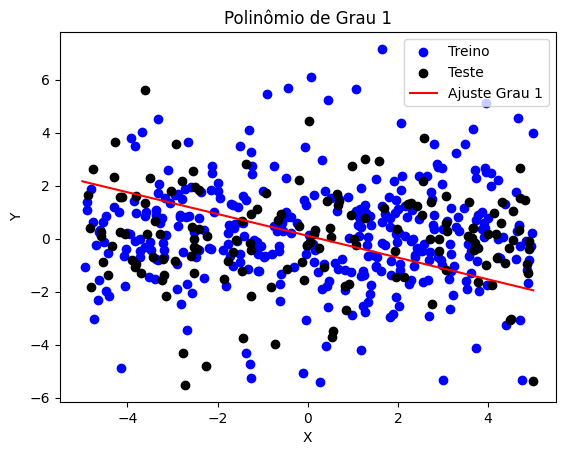

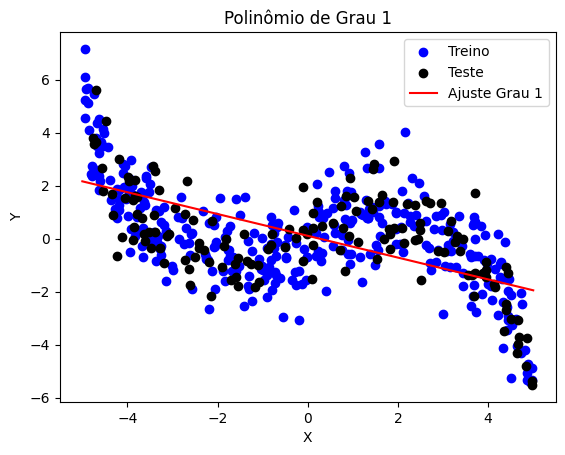

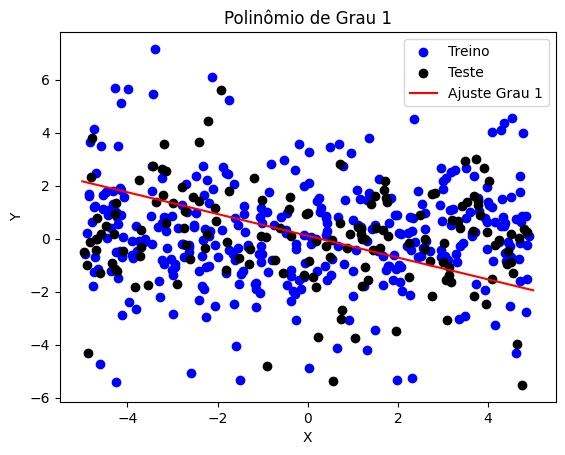

Grau 2: R2 = 0.25794006674019776 | MSE = 2.4169665521386747


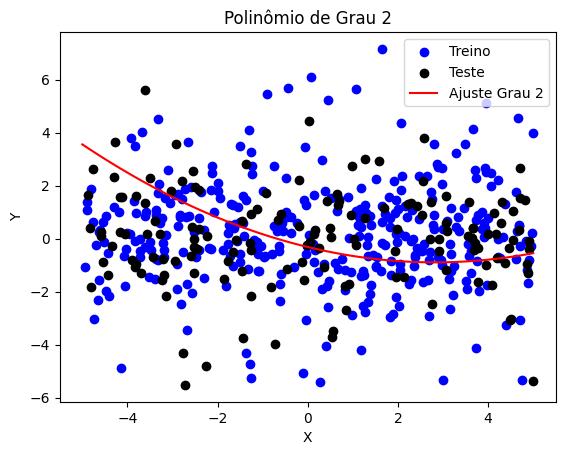

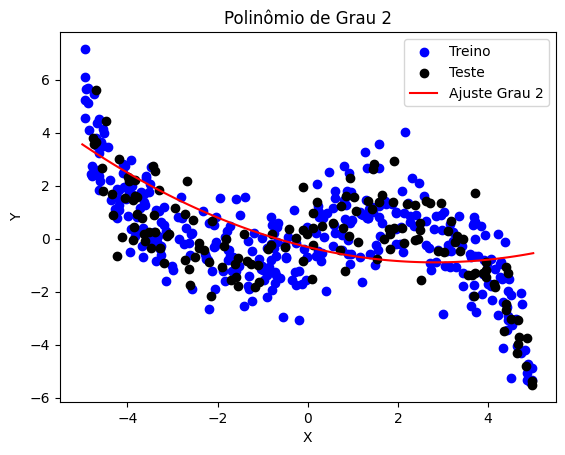

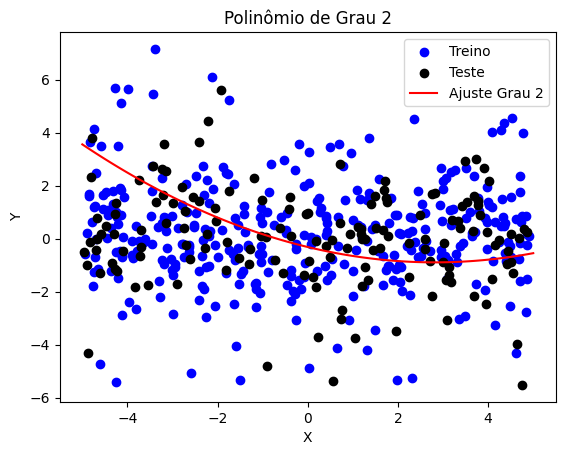

Grau 3: R2 = 0.6675419127444862 | MSE = 1.0828506443606234


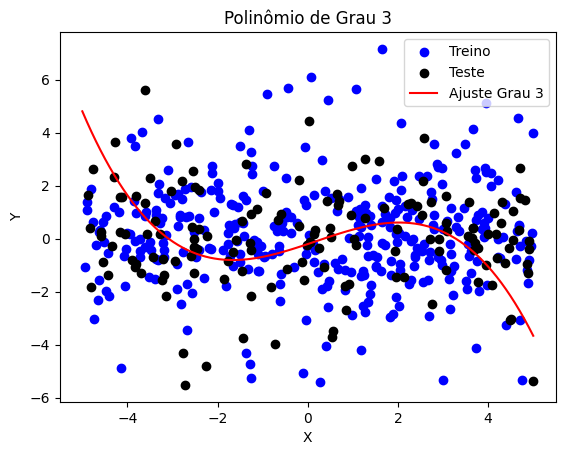

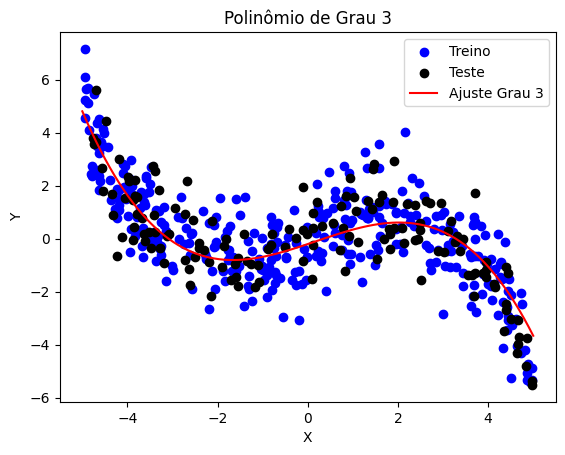

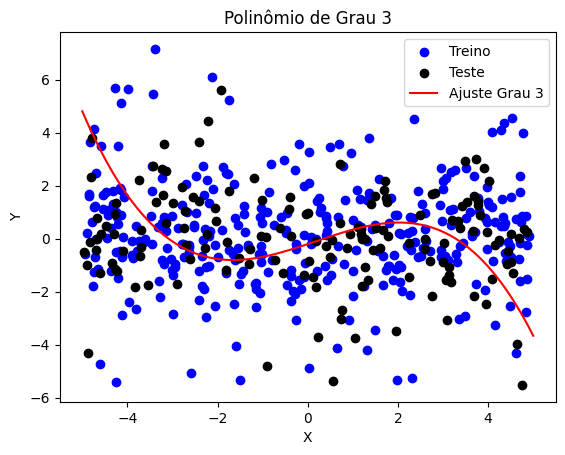

[ 0.00000000e+00 -7.15872262e-02  6.11181820e-01  3.09615285e-02
  9.98823325e-03 -1.07220157e-02  6.54012275e-03  2.94711722e-04
  4.60063089e-03  2.02521591e-02  5.02655501e-03  1.58291435e-03
  1.48384330e-03 -1.02110984e-04  3.62479206e-03 -1.82812662e-03
 -6.35976667e-02 -3.24595719e-03  8.85333371e-04 -5.12695876e-04]
Grau 4: R2 = 0.6584149988870622 | MSE = 1.1125779541491192


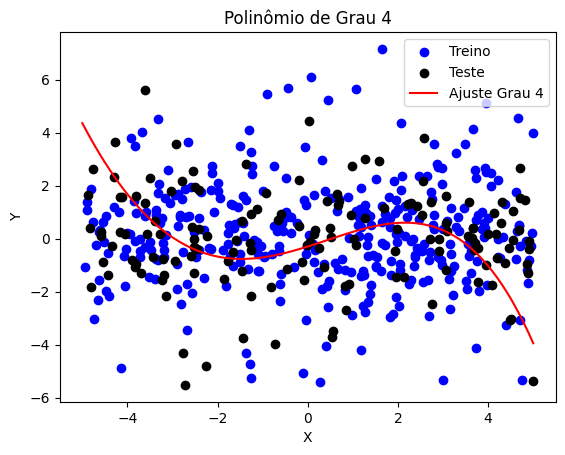

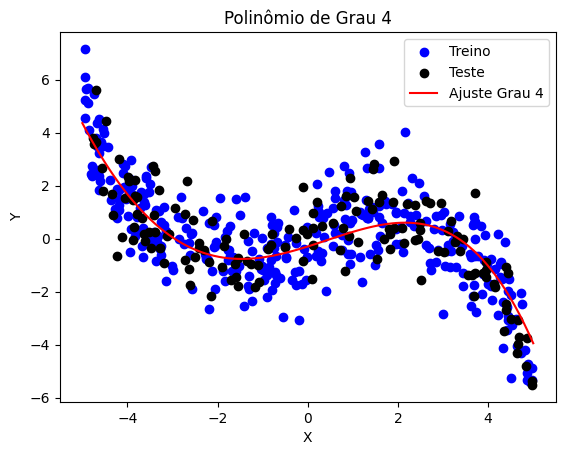

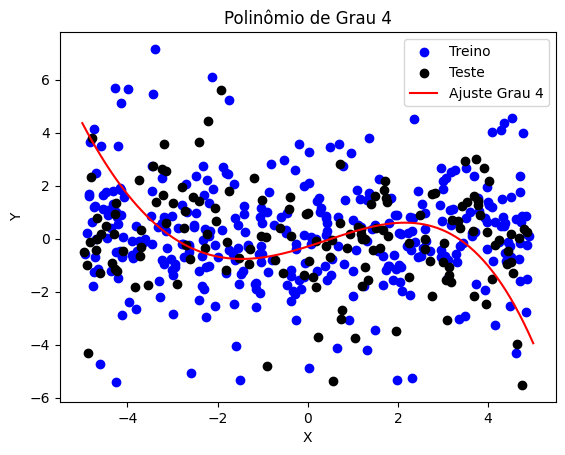

Grau 5: R2 = 0.6519795237998414 | MSE = 1.1335389673176994


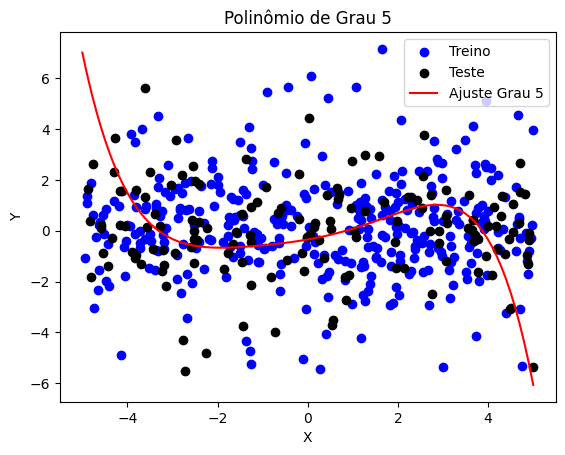

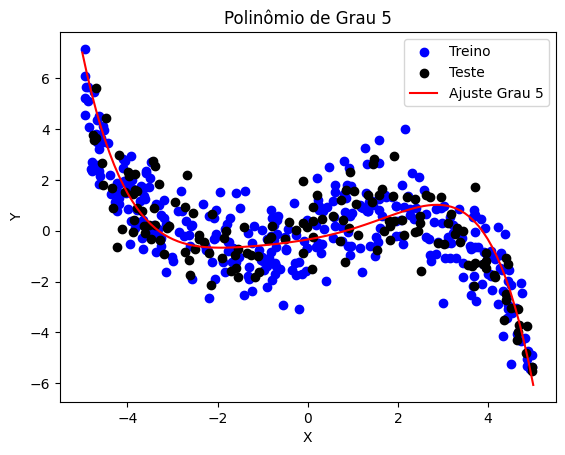

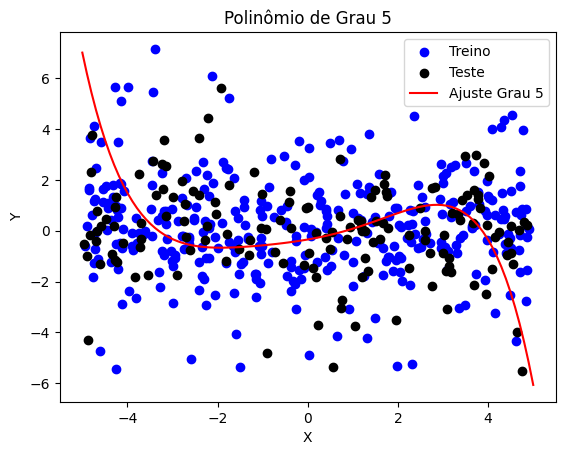

Grau 6: R2 = 0.4490861510298275 | MSE = 1.794383831264879


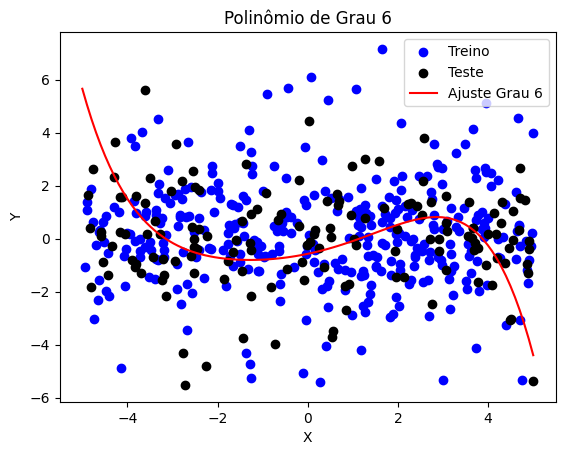

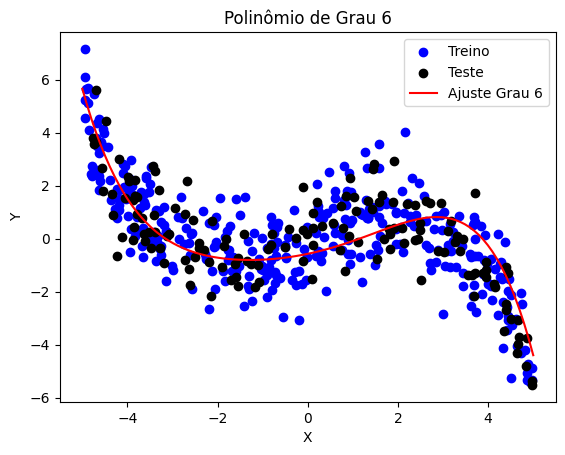

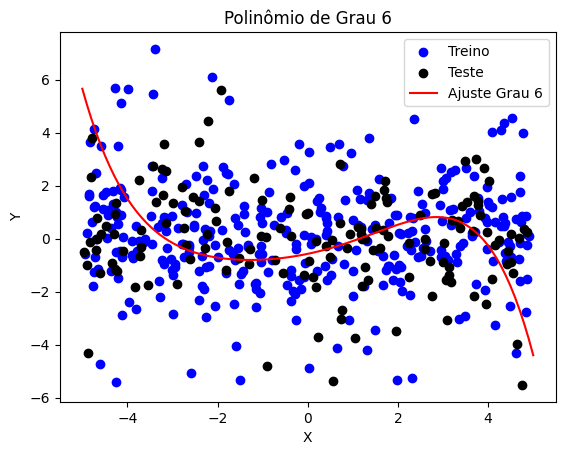

Grau 7: R2 = 0.013635542249966215 | MSE = 3.2126918537799134


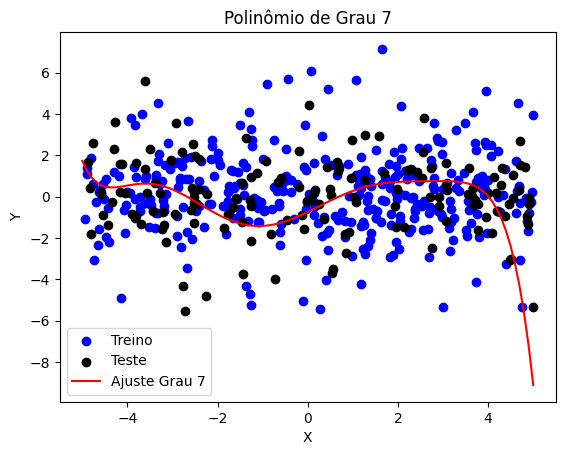

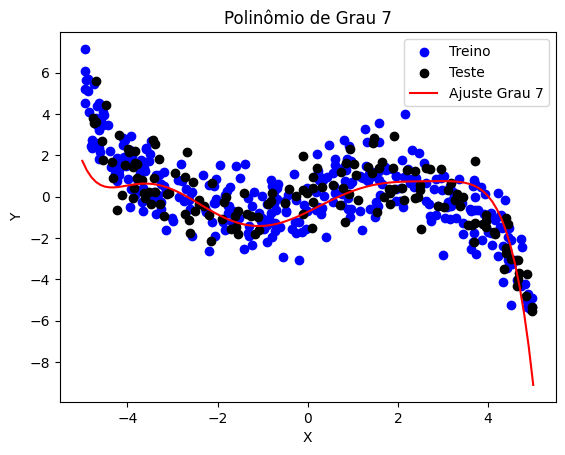

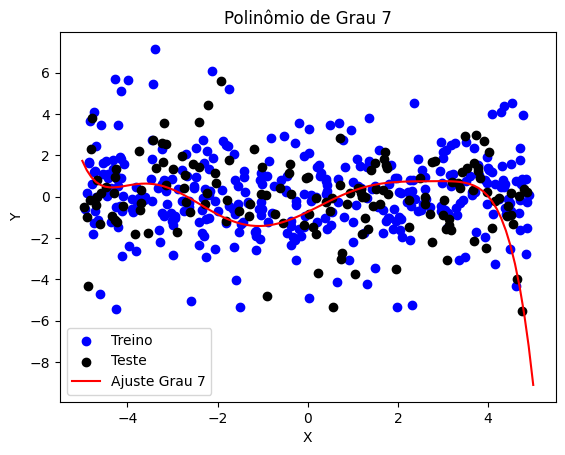

Grau 8: R2 = -0.8780364341817934 | MSE = 6.116960425521291


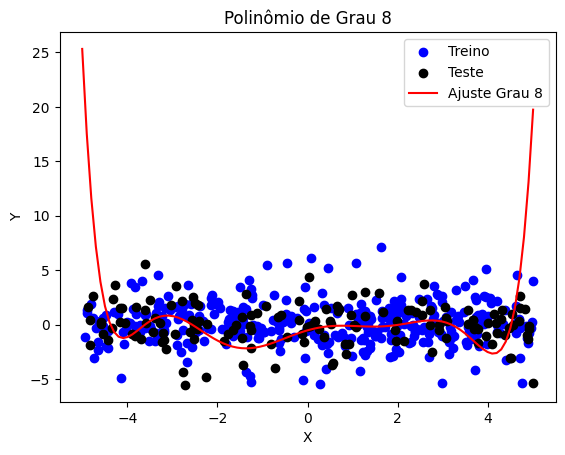

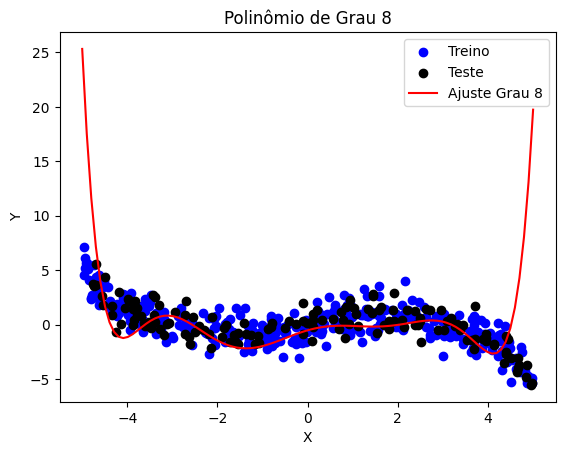

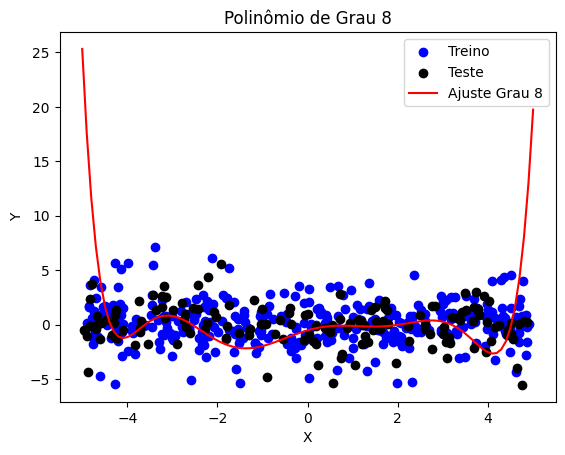

Grau 9: R2 = -17.33236606477451 | MSE = 59.710427169242124


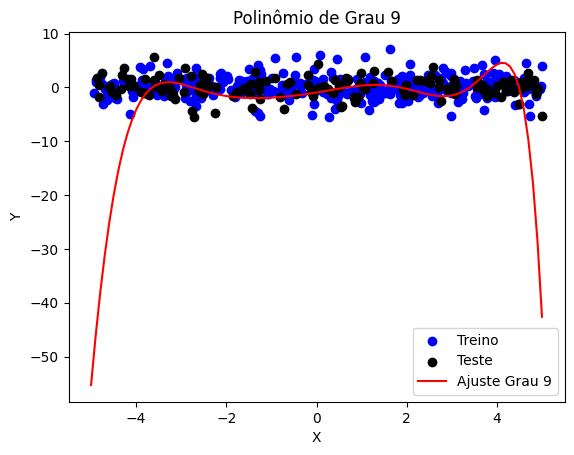

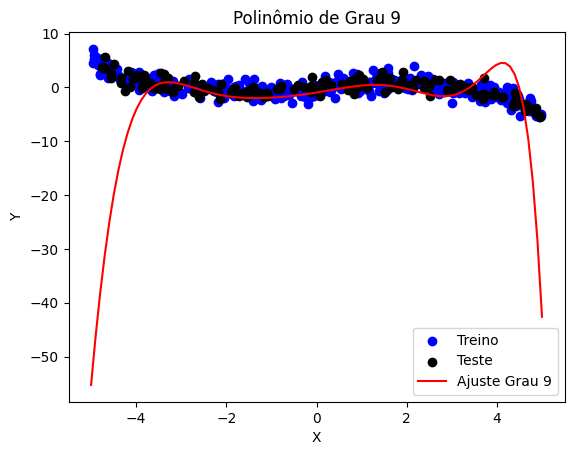

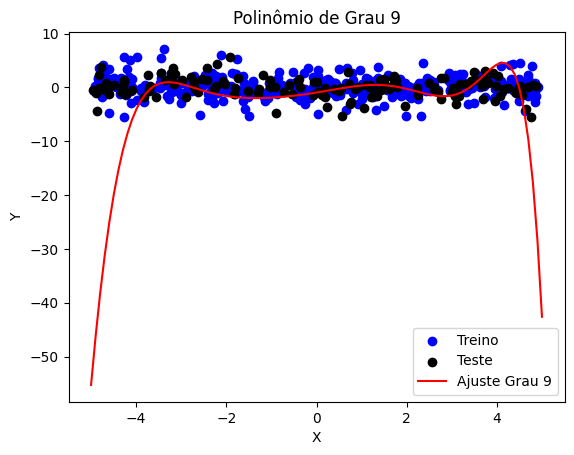

Grau 10: R2 = -124.58098907066284 | MSE = 409.03037148889905


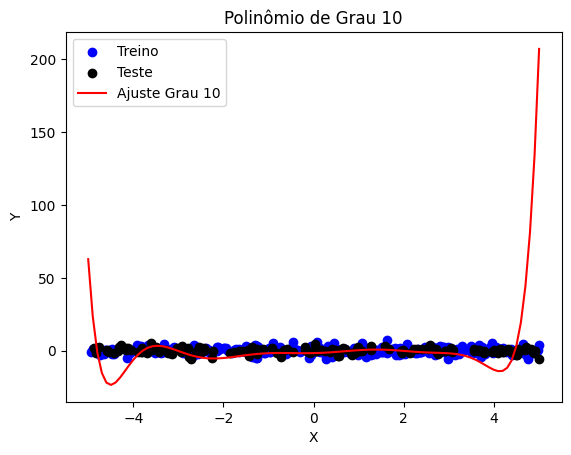

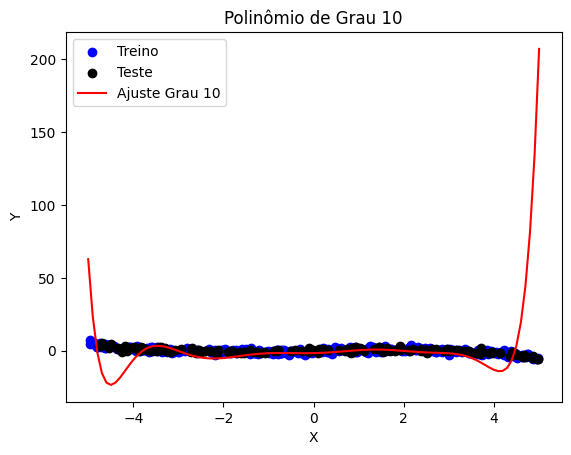

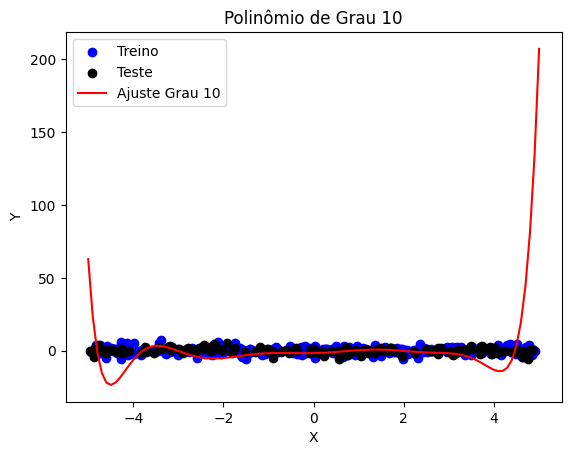

In [ ]:
degrees=[1,2,3,4,5,6,7,8,9,10]
for d in degrees:
  poly = PolynomialFeatures(degree=d)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly=poly.fit_transform(X_test)
  modelo_poly = LinearRegression()
  modelo_poly.fit(X_train_poly, Y_train)
  Y_pred_test=modelo_poly.predict(X_test_poly)
  print(f"Grau {d}: R2 = {r2_score(Y_test, Y_pred_test)} | MSE = {mean_squared_error(Y_test, Y_pred_test)}")

  plt.figure()
  plt.scatter(X_train["x1"], Y_train, color='blue', label="Treino")
  plt.scatter(X_test["x1"], Y_test, color='black', label="Teste")

  X_plot = pd.DataFrame(np.zeros((100, 3)), columns=['x1', 'x2', 'x3'])
  X_plot["x1"]=np.linspace(-5,5,100)
  X_plot["x2"]=np.linspace(-5,5,100)
  X_plot["x3"]=np.linspace(-5,5,100)
  X_plot_poly = poly.transform(X_plot)
  Y_plot = modelo_poly.predict(X_plot_poly)

  plt.plot(X_plot["x1"], Y_plot, color='red', label=f"Ajuste Grau {d}")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(f"Polinômio de Grau {d}")
  plt.legend()
  plt.show()

  plt.figure()
  plt.scatter(X_train["x2"], Y_train, color='blue', label="Treino")
  plt.scatter(X_test["x2"], Y_test, color='black', label="Teste")

  plt.plot(X_plot["x2"], Y_plot, color='red', label=f"Ajuste Grau {d}")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(f"Polinômio de Grau {d}")
  plt.legend()
  plt.show()

  plt.figure()
  plt.scatter(X_train["x3"], Y_train, color='blue', label="Treino")
  plt.scatter(X_test["x3"], Y_test, color='black', label="Teste")

  plt.plot(X_plot["x3"], Y_plot, color='red', label=f"Ajuste Grau {d}")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(f"Polinômio de Grau {d}")
  plt.legend()
  plt.show()

  if d==3:
    print(modelo_poly.coef_)




In [ ]:
X_train_poly = np.column_stack([
    X_train["x1"], X_train["x1"]**2, X_train["x1"]**3,
    X_train["x2"], X_train["x2"]**2, X_train["x2"]**3,
    X_train["x3"], X_train["x3"]**2, X_train["x3"]**3
])
X_test_poly=np.column_stack([
    X_test["x1"], X_test["x1"]**2, X_test["x1"]**3,
    X_test["x2"], X_test["x2"]**2, X_test["x2"]**3,
    X_test["x3"], X_test["x3"]**2, X_test["x3"]**3
])
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, Y_train)
Y_pred_test=modelo_poly.predict(X_test_poly)
print(f"Grau {d}: R2 = {r2_score(Y_test, Y_pred_test)} | MSE = {mean_squared_error(Y_test, Y_pred_test)}")

Grau 10: R2 = 0.6816830146953592 | MSE = 1.0367916012918246


In [ ]:
X_train_poly = np.column_stack([
    X_train["x1"], X_train["x1"]**2,
    X_train["x2"], X_train["x2"]**2, X_train["x2"]**3,
    X_train["x3"], X_train["x3"]**2
])
X_test_poly=np.column_stack([
    X_test["x1"], X_test["x1"]**2,
    X_test["x2"], X_test["x2"]**2, X_test["x2"]**3,
    X_test["x3"], X_test["x3"]**2
])
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, Y_train)
Y_pred_test=modelo_poly.predict(X_test_poly)
print(f"Grau {d}: R2 = {r2_score(Y_test, Y_pred_test)} | MSE = {mean_squared_error(Y_test, Y_pred_test)}")

Grau 10: R2 = 0.6923425480730745 | MSE = 1.002072389971297


In [ ]:
X_train_poly = np.column_stack([
    X_train["x1"],
    X_train["x2"], X_train["x2"]**2, X_train["x2"]**3,
    X_train["x3"]
])
X_test_poly=np.column_stack([
    X_test["x1"],
    X_test["x2"], X_test["x2"]**2, X_test["x2"]**3,
    X_test["x3"]
])
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, Y_train)
Y_pred_test=modelo_poly.predict(X_test_poly)
print(f"Grau {d}: R2 = {r2_score(Y_test, Y_pred_test)} | MSE = {mean_squared_error(Y_test, Y_pred_test)}")
print(modelo_poly.coef_)

Grau 10: R2 = 0.7087823963671992 | MSE = 0.9485260904499321
[-1.71137791e-02  6.45039636e-01  4.60616023e-03 -6.44521493e-02
  5.54981478e-04]


In [ ]:
X_train_poly = np.column_stack([
    X_train["x1"],
    X_train["x2"], X_train["x2"]**3,

])
X_test_poly=np.column_stack([
    X_test["x1"],
    X_test["x2"], X_test["x2"]**3,
])
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, Y_train)
Y_pred_test=modelo_poly.predict(X_test_poly)
print(f"Grau {3}: R2 = {r2_score(Y_test, Y_pred_test)} | MSE = {mean_squared_error(Y_test, Y_pred_test)}")
print(modelo_poly.coef_)

Grau 3: R2 = 0.7107170372012418 | MSE = 0.9422247635938364
[-0.01722808  0.64600355 -0.06457916]
